# Bubble plot of scientific papers data

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler

plt.style.use(["ggplot", "./example.mplstyle"])
style_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Setup

In [4]:
source_path = os.path.join("data", "papers.csv")
papers_df = pd.read_csv(source_path)
papers_df.drop(
    columns=["Comments (enter 'N/A' if none)", "Title.1"], inplace=True
)

YEAR = "Year of publication"
VAL_TYPE = "validation"
validation_stages = [
    "Internal validation",
    "External retrospective validation (other hospitals)",
    "External retrospective validation (separate dataset)",
    "Prospective observational validation",
    "Non-randomised interventional validation (clinical trial)",
    "Randomised interventional validation (clinical trial)",
    "Regulatory approval",
    "Post-deployment surveillance"
]

tmp_df = papers_df.copy()

# Create a validation column with the name of the furthest stage of validation of each paper
tmp_df[VAL_TYPE] = [None for itr in range(len(papers_df))]
for row_idx in range(tmp_df.shape[0]):
    for val_stage in validation_stages:
        if tmp_df[val_stage][row_idx]:
            tmp_df.loc[row_idx, VAL_TYPE] = val_stage

#QOL functions
def get_papers_in_year_and_val(year, val):
    return tmp_df[(tmp_df[YEAR] == year) & (tmp_df[val])].shape[0]

def get_scatter_xyr(year, val):
    x = year - tmp_df[YEAR].min()
    y = validation_stages.index(val)
    r = tmp_df[(tmp_df[YEAR] == year) & (tmp_df[val])].shape[0]
    return x, y, r


## Plot

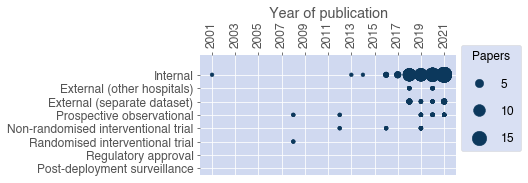

In [5]:
# Data extraction
xs, ys, rs = [], [], []
R_SCALE = 14
for year in tmp_df[YEAR]:
    for val in validation_stages:
        x, y, r = get_scatter_xyr(year, val)
        xs.append(x)
        ys.append(y)
        rs.append(0 if r==0 else r*R_SCALE)

##########
## Plot ##
##########

# Clean way to specify arguments temporary for just this plot
with plt.rc_context({
    "axes.facecolor": "#D0D9F0",
}):
    plt.figure(figsize=(7.5, 2.7))

    validation_stages_ticks = [
        "Internal",
        "External (other hospitals)",
        "External (separate dataset)",
        "Prospective observational",
        "Non-randomised interventional trial",
        "Randomised interventional trial",
        "Regulatory approval",
        "Post-deployment surveillance"
    ]

    scatter = plt.scatter(xs, ys, rs)

    # Custom legend for scatter plot bubble sizes
    # Sets custom legend position, padding, color, title
    handles, labels = scatter.legend_elements(
        prop="sizes", num=5, color=style_colors[0], func=lambda r: r/R_SCALE
    )
    plt.gca().legend(
        handles, labels, title="Papers",
        loc=(1.02, 0.2), borderpad=0.5, labelspacing=1.2
    )

    # Move x labels and ticks to the top
    plt.xticks(list(range(0, 21, 2)), list(range(2001, 2022, 2)), rotation=90)
    plt.xlabel("Year of publication")
    plt.gca().xaxis.tick_top()
    plt.gca().xaxis.set_label_coords(.5, 1.4)

    # Invert y axis
    plt.ylim(-1.5, 7.5)
    plt.yticks(list(range(len(validation_stages))), validation_stages_ticks)
    plt.gca().invert_yaxis()

    # Hide all frame sides
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(os.path.join("out", f"Bubble plot.png"))

    plt.show()